## **H1N1 Vaccination Survey Results Project** ##

Student: Pamela Okinyo

Student pace: Part Time

PHASE 3

Technicl Mentor: Samuel Karu

**PROJECT OVERVIEW**

In this project, we want to use data from the National Flu Survey (NHFS 2009) to predict whether or not respondents got the H1N1 vaccine. Understanding past vaccination patterns provides an important background for understanding those of more recent pandemics such as COVID-19. The most powerful predictors of Vaccination Status are Doctor Recommendation of H1N1 vaccine, Health Insurance, opinion of H1N1 Vaccine effectiveness, opinion of H1N1 risk. For making the prediction, we used six different machine learning models: Decision Tree Classifier, Logistic Regression, Random Forest, K-Nearest Neighborhood Classifier

## **BUSINESS UNDERSTANDING** ##

**INTRODUCTION**

Objective: To predict whether individuals will get vaccinated for H1N1 and/or seasonal flu.


End Users: Public health officials, and policy makers and/or vaccine providers who want to target specific populations to increase vaccination rates and improve public health outcomes.

True business problem:

Predicting who is vaccinated or not accurately? (Deliverable: Model)
What are the factors that influence people get H1N1 vaccine or not? (Deliverable: Analysis)
Context:

False negative: Saying people did not get the vaccine when they actually did.

Outcome: Not a big problem

False positive: Saying people got the vaccine when they actually did not.

Outcome: Big problem

Evaluation: We will focus on accuracy, f1, and precision scores for our model iterations in order to minimize False Positives, because in our business context false positives are a much more costly mistake than false negatives.

Accuracy
Precision
Recall
F1-Score

**PROBLEM STATEMENT**

The task is to predict whether individuals received the H1N1 flu vaccine or the seasonal flu vaccine using data from the 2009 National H1N1 Flu Survey. This binary classification problem involves analyzing various factors, such as demographics, opinions, and health behaviors, to determine their relationship with vaccination behavior. The outcome of this analysis will help public health authorities identify key factors influencing vaccine acceptance and inform strategies to enhance vaccine coverage in the population.


**OBJECTIVES**

**Identify Key Predictors**: Determine the most significant factors that influence whether an individual received the H1N1 vaccine.

**Develop a Predictive Model**: Build a binary classification model to accurately predict whether a survey respondent received the chosen vaccine.

**Evaluate Model Performance**: Assess the model's performance using appropriate metrics such as accuracy, precision, recall, AUC and F1 score to ensure its reliability in predicting vaccination behavior.

**Provide Actionable Insights**: Analyze the model's findings to provide public health authorities with actionable insights that can guide future vaccination campaigns and strategies, particularly in the context of managing public health responses to pandemics.

**DATA SOURCE**

Dataset: Flu Shot Learning dataset from Kaggle. This dataset includes features such as demographic information and past behavior, and the target variables are whether the individual received the H1N1 and/or seasonal flu vaccine.

**DATASET DESCRIPTION**

The datasetthere are two target variables:

h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
seasonal_vaccine - Whether respondent received seasonal flu vaccine.
Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.
The train and test datasets have 36 columns.The first column respondent_id is a unique and random identifier. The remaining 35 features are described in a separate file feature_description.txt.

**METHODOLOGY**


The project will follow a structured data science process, including:

**Data Inspection**: Gathering the necessary data from the provided dataset.

**Data Cleaning and Preparation**: Cleaning the data to handle missing values, outliers, and incorrect data types.

**Exploratory Data Analysis (EDA)**: Analyzing the data to find patterns, relationships, and insights.

**Modeling**: Building classification models to predict how likely individuals are to receive their h1n1 vaccines based on selected featurs.

**Model Evaluation**: Assessing the models' performance using appropriate metrics.

**Interpretation**: Drawing conclusions from the model results and providing recommendations.

## **DATA UNDERSTANDING** ##

**1. Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import random
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,  StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score,  accuracy_score, auc
from sklearn.metrics import precision_recall_curve, ConfusionMatrixDisplay, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier, plot_importance

**Loading Datasets**

Train Test:To train the model and to test the model performance
Label dataset with the target variables will be merged to the train data:
h1n1_vaccine - respondent received H1N1 flu vaccine.
seasonal_vaccine - respondent received seasonal flu vaccine.

In [ ]:
#load data sets
train_data = pd.read_csv('Data/training_set_features.csv')
test_data = pd.read_csv('Data/test_set_features.csv')
label_data = pd.read_csv('Data/training_set_labels.csv')

**Data Inspection**

In [ ]:
#Inspect the size of train, test and label
print('Train shape:', train_data.shape)

print('Test shape:', test_data.shape)

print('Label shape:', label_data.shape)

Train shape: (26707, 36)
test shape: (26708, 36)
label shape: (26707, 3)


From above results, we see that both the train and test datasets have the same number of rows(26,707) and columns(36). The label data on the other end has also same number of rows which is 26,707 and 3 columns. This is because the label data just contains the target variables and the responded ids.

In [ ]:
#Display first 3 rows of all data sets

In [ ]:
train_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
#inspecting the first five rows of the test dataset
test_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


Some columns have missing values and some have insignificant data as noted in the columns; "employment_industry", "employment_occupation" and "hse_geo_region"

In [ ]:
label_data.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


Since "respondent_id" is appearing in both label data and train dataset, it is recommended to merge the data sets using the identified variable to the train data so as to assist in modeling process.

***Investigate Features*** and ***Exploratory Data Analysis***


We will start by investigating the data sources. The data source in this case is a survey with only single choice results, thus the data is fairy clean. There is some missing data which we will have to handle.*italicized text*

In [ ]:
#Investigating features of the data sets
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

**Observations**
The data is a mix of strings and floats with some missing data

Missing Data: There are several columns that contain missing values and need to be handled in the cleaning process. eg. doctor_recc_h1n1 and doctor_recc_seasonal have very high missing data; there are non-null values of 24,547 out of 26,707 entries.

The column health_insurance has missing values of more than 45%; only 14,433 are non-null.

employment_industry and employment_occupation bear the highest number of missings-13,377 and 13,237 entries, respectively.

Column Types: Based on the data types for each column type described below, we will not have to do any data type conversion since sll the columns are in their desired datatype format.

Numeric Columns: There are 23 numeric columns (float64 type) and are principally an expression of concern levels, knowledge levels, and behaviors concerning H1N1 and seasonal flu, as well as some demographic data, such as number of people in the household.

The data set consists of 12 object-type columns, which are the categorical columns: age_group, education, race, sex, and employment_status. These are fairly key for demographic analyses and will most likely need encoding prior to modeling.

Identifier Column: respondent_id is a unique identifier for each survey respondent and of type int64.

In [ ]:
#Statistical Summary
train_data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


Summary of the data description:

Binary Variables:

Columns like behavioral_antiviral_meds and behavioral_face_mask are binary (0 or 1 values). Most responses are 0, indicating 'No', with mean values low. As the range is restricted to 0 and 1, no outliers are present in these columns.
Ordinal Variables:

Variables such as h1n1_concern and h1n1_knowledge have values ranging from 0 to 2 or 3. The mean values are below the maximum, indicating that most respondents have lower concern or knowledge levels. This suggests a concentration of responses at the lower end of the scale.
Household Variables:

household_adults and household_children show a range from 0 to higher values reflecting household size. The mean values are closer to the lower end, indicating that most households have fewer members. Extreme values might be outliers but could also represent genuine variability in household sizes.

In [ ]:
#Column names
train_data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [ ]:
#identifying unique values
unique_values = {
    'income_poverty': train_data['income_poverty'].unique(),
    'marital_status': train_data['marital_status'].unique(),
    'rent_or_own': train_data['rent_or_own'].unique(),
    'employment_status': train_data['employment_status'].unique(),
    'education': train_data['education'].unique(),
    'race': train_data['race'].unique(),
    'sex': train_data['sex'].unique(),
    'age_group': train_data['age_group'].unique(),
    'train_data.columns': train_data.columns.tolist()
}

# Print unique values for each feature
for feature, values in unique_values.items():
    print(f"Unique values for {feature}: {values}")

Unique values for income_poverty: ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]
Unique values for marital_status: ['Not Married' 'Married' nan]
Unique values for rent_or_own: ['Own' 'Rent' nan]
Unique values for employment_status: ['Not in Labor Force' 'Employed' 'Unemployed' nan]
Unique values for education: ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
Unique values for race: ['White' 'Black' 'Other or Multiple' 'Hispanic']
Unique values for sex: ['Female' 'Male']
Unique values for age_group: ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
Unique values for train_data.columns: ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'h

## **DATA PREPROCESSING** ##

**DATA MERGE**

Combine all datasets, including both feature and target variables, using the respondent_id column as the merging key.

In [ ]:
#merging of the train and the labels datasets
train_df_merged = train_data.merge(label_data, on='respondent_id')

In [ ]:
#checking the data sizes before and after merging
print('Initial shape', train_data.shape)
print('Merged Shape', train_df_merged.shape)

Shape before Merging (26707, 36)
Shape after Merging (26707, 38)


From above output, we see that the data size has changed since we have an addition of 2 columns making the new column number total to 38 while the row sizes remain the same(26,707).
We will focus on only one target which is the H1N1 vaccine. So will go ahead and drop the seasonal vaccine column

In [ ]:
#Drop Column "seasonal_vaccine target"
train_df_merged.drop('seasonal_vaccine', axis=1, inplace=True)

In [ ]:
#Confirm column is dropped
print(train_df_merged.shape)

(26707, 37)


**HANDLING MISSING VALUES**

Confirming impact that missing data has on the accuracy of our data sets to enable us understand the Nature of Missing Data to identify if we will use Data imputation Techniques, Utilizing Advanced Algorithms, Multiple Imputation Methods, or dropping missing values

In [ ]:
#Getting percenatges of missing values
def missing_data_percentage(df):
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100
    return pd.DataFrame({
        'Total Missing Values': missing_data,
        'Percentage Missing': missing_percentage
    })

# Calculate missing data percentages
train_missing = missing_data_percentage(train_df_merged)


# Display missing data percentages
print("Training Data Missing Values:")
print(train_missing.sort_values(by='Percentage Missing', ascending=False))

Training Data Missing Values:
                             Total Missing Values  Percentage Missing
employment_occupation                       13470           50.436215
employment_industry                         13330           49.912008
health_insurance                            12274           45.957989
income_poverty                               4423           16.561201
doctor_recc_h1n1                             2160            8.087767
doctor_recc_seasonal                         2160            8.087767
rent_or_own                                  2042            7.645936
employment_status                            1463            5.477965
marital_status                               1408            5.272026
education                                    1407            5.268282
chronic_med_condition                         971            3.635751
child_under_6_months                          820            3.070356
health_worker                                 804           

***Dropping Column with minimal impact on the data:
i.e.
employment_industry,employment_occupation,hhse_geo_region, census_msa

In [ ]:
# List of columns to drop
columns_to_drop = [
    'employment_industry',
    'employment_occupation', 'census_msa', 'hhs_geo_region'
]

# Drop the specified columns from the training and test datasets
train_data_cleaned = train_df_merged.drop(columns=columns_to_drop)

In [ ]:
print(train_data_cleaned.shape)

(26707, 33)


In [ ]:
# Calculate missing data percentages
train_missing2 = missing_data_percentage(train_data_cleaned)


# Display missing data percentages
print("Training Data Missing Values:")
print(train_missing2.sort_values(by='Percentage Missing', ascending=False))

Training Data Missing Values:
                             Total Missing Values  Percentage Missing
health_insurance                            12274           45.957989
income_poverty                               4423           16.561201
doctor_recc_h1n1                             2160            8.087767
doctor_recc_seasonal                         2160            8.087767
rent_or_own                                  2042            7.645936
employment_status                            1463            5.477965
marital_status                               1408            5.272026
education                                    1407            5.268282
chronic_med_condition                         971            3.635751
child_under_6_months                          820            3.070356
health_worker                                 804            3.010447
opinion_seas_sick_from_vacc                   537            2.010709
opinion_seas_risk                             514           

**IMPUTING MISSING VALUES**

Impute the missing values using the most frequent value for the binary columns and the ordinal columns.


categorical columns we replace missing values with 'UNKNOWN' value

In [ ]:
#imputing the missing values

from scipy.stats import mode


# List of binary columns (with expected values)
binary_columns = [
    'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
    'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
    'chronic_med_condition', 'child_under_6_months', 'health_worker','health_insurance'
]

# List of ordinal columns (with expected discrete values)
ordinal_columns = [
    'h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
    'opinion_seas_risk', 'opinion_seas_sick_from_vacc'
]

# List of categorical string columns
categorical_columns = [
    'education', 'race', 'sex', 'marital_status', 'rent_or_own',
    'employment_status','income_poverty'

]

# Handle missing values in binary columns with mode
for col in binary_columns:
    mode_value = mode(train_data_cleaned[col].dropna())[0][0]
    train_data_cleaned[col].fillna(mode_value, inplace=True)

# Handle missing values in ordinal columns with mode
for col in ordinal_columns:
    mode_value = mode(train_data_cleaned[col].dropna())[0][0]
    train_data_cleaned[col].fillna(mode_value, inplace=True)

# Handle missing values in categorical string columns with 'UNKNOWN'
for col in categorical_columns:
    train_data_cleaned[col].fillna('UNKNOWN', inplace=True)

# Handle missing values in numeric columns if there are any
numeric_columns = train_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if col not in binary_columns + ordinal_columns:
        mode_value = mode(train_data_cleaned[col].dropna())[0][0]
        train_data_cleaned[col].fillna(mode_value, inplace=True)

# Verify that missing values are handled
print(train_data_cleaned.isnull().sum())


respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
household_

**Checking for Outliers**

In [ ]:
# List of the columns to check for outliers
features_check_outliers = [
    'h1n1_concern', 'h1n1_knowledge','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc','household_adults', 'household_children'
]

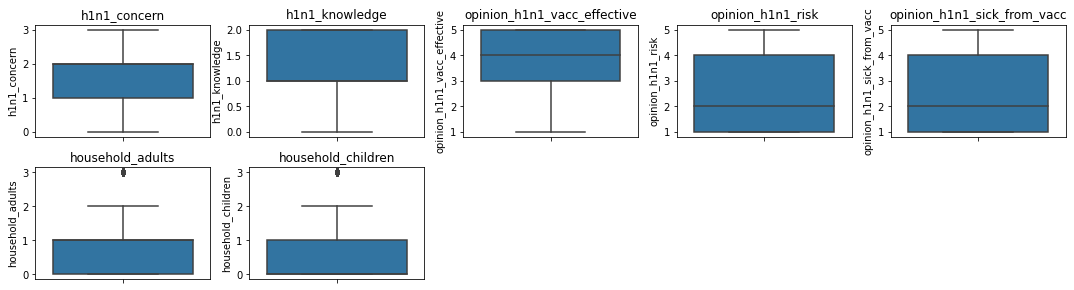

In [ ]:
# Create boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_check_outliers, 1):
    plt.subplot(5, 5, i)  # Adjust grid size based on number of plots
    sns.boxplot(y=train_data_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

**Insights from Outlier Analysis**

The box plots reveal several interesting patterns across our ordinal variables:

1. H1N1-related variables:
   - Concern levels (h1n1_concern) show a wide range of responses, with some extreme high values.
   - Knowledge about H1N1 (h1n1_knowledge) is generally high, with fewer outliers.
   - Opinions on vaccine effectiveness and risk (opinion_h1n1_vacc_effective, opinion_h1n1_risk) have a more balanced distribution with some outliers on both ends.

2. Seasonal flu variables:
   - Opinions on seasonal flu vaccine effectiveness (opinion_seas_vacc_effective) are generally positive, with some low outliers.
   - Perceived risk of seasonal flu (opinion_seas_risk) shows a wide range of responses.

3. Vaccine side effects:
   - Both H1N1 and seasonal flu vaccines show some outliers for perceived risk of getting sick from the vaccine (opinion_h1n1_sick_from_vacc, opinion_seas_sick_from_vacc), but generally lower values.

4. Household composition:
   - Number of adults and children (household_adults, household_children) show some high outliers, potentially indicating larger families.
These outliers may represent genuine extreme cases (e.g., large families, individuals with very strong opinions) or potential data entry errors. Further investigation of these cases could provide valuable insights or inform data cleaning decisions.

In [ ]:
train_data_cleaned['household_adults'].unique()

array([0., 2., 1., 3.])

In [ ]:
def find_outliers_sum(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers[col].sum()

# Get sum of outliers for each column
outliers_sum_dict = {}
for col in features_check_outliers:
    outliers_sum = find_outliers_sum(train_data_cleaned, col)
    if outliers_sum != 0:
        outliers_sum_dict[col] = outliers_sum

# Print sum of outliers
for col, outliers_sum in outliers_sum_dict.items():
    print(f"Sum of outliers in {col}: {outliers_sum}")


Sum of outliers in household_adults: 3375.0
Sum of outliers in household_children: 5241.0


In [ ]:
# Calculate skewness for the specified columns
skewness = train_data_cleaned[features_check_outliers].skew()

# Print skewness values
print("Skewness for each column:")
print(skewness)


Skewness for each column:
h1n1_concern                  -0.164127
h1n1_knowledge                -0.234254
opinion_h1n1_vacc_effective   -0.915459
opinion_h1n1_risk              0.688264
opinion_h1n1_sick_from_vacc    0.666603
household_adults               0.785813
household_children             1.558345
dtype: float64


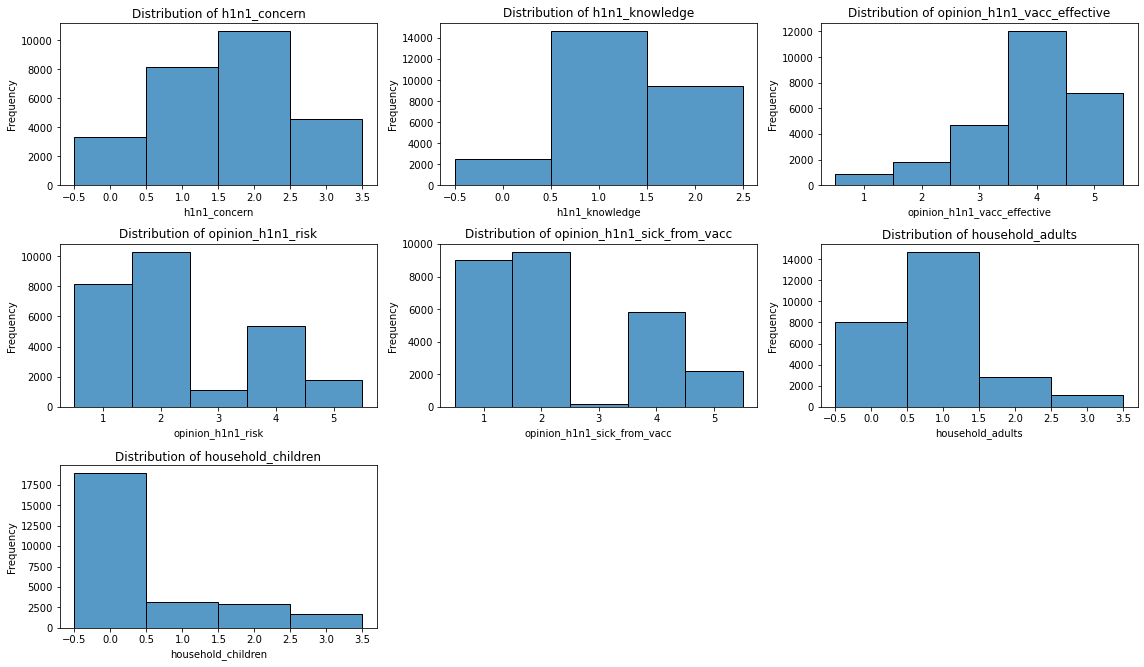

In [ ]:

# Set up the plotting grid
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features_check_outliers, 1):
    plt.subplot(4, 3, i)  # Adjust the grid size if you have more/less features
    sns.histplot(train_data_cleaned[feature].dropna(), discrete=True, kde=False, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



***Observations***

h1n1_concern: Distribution seems fairly symmetric without any extreme skewness. Data is mostly evenly distributed across several categories, showing the balanced distribution of data.

h1n1_knowledge: It is a right-skewed distribution, meaning that higher values for this variable will be less common. It might indicate that most respondents are grouped around the lower values, with only a few subjects in the higher ranges.

opinion_h1n1_vacc_effective: This is similar to the second plot, being right-skewed. There is a high concentration of data around the lower to middle range of values, with a few higher values.

Plot 4: In this distribution, there is a high right-skewness, which leads to more respondents falling in the lower range while fewer respondents are located at higher values.

opinion_h1n1_risk: This histogram has more or less equally distributed categories with small differences between them. There is no strong evidence of skewness in the data.

opinion_h1n1_sick_from_vacc : The average distribution is right-skewed, with a very conspicuous concentration falling in the lower values with fewer observations in higher magnitudes.

opinion_seas_vacc_effective: Like above, this distribution is right-skewed. There are a few marked peaks, which might reflect subgroups or distinct responses in the population.

opinion_seas_risk: This distribution is highly right-skewed, featuring a sharp peak in the low end and a very quick drop-off as values increase. What that would suggest is most of the respondents fell in the lower range, few outliers.

opinion_seas_sick_from_vacc : This plot is also right-skewed but the kurtosis, or sharpness, of the distribution is not quite as extreme as previously illustrated. The lower values still tend to cluster, but there is more dispersion of the observations in the middle range of values.

household_adults: Here we have a right-skewed distribution of observations being most highly concentrated within the lower category values. There are some middle observations but very few towards the top.

household_children: This histogram is highly right-skewed, with the majority of the data falling into the first category. Very few observations occur within any of the other categories. This sometimes occurs with data when there is strong preference or a dominant category for a certain dataset.

**General Observations and Considerations:**

Right-skewed: Most of the distributions are right-skewed, pointing to the fact that most of the responses in each variable fall within the lower scale extreme. Most of the higher-order responses fell within a long tail. This might be symptomatic of the prevalence of some certain behaviors or opinions among the majority, while the extreme or outlier responses might be few and far in between.

Outliers: There are a few distributions that are quite long-tailed, implying the existence of outliers. These can be minority opinions or behaviors important within specific contexts.

Variation in Distribution: The variation in the shape of distribution shows different aspects, with different variables captured, indicating respondents' opinion, behavior, or demography. Therefore, cleaning data would have one single approach applied across such as removing outliers; this could not apply across all data.



Decision on Handling Outliers:

Outliers in the columns opinion_seas_vacc_effective, opinion_seas_sick_from_vacc, household_adults, and household_children will not be removed or capped. Here’s why:

Behavioral and Opinion Data:

The variables opinion_seas_vacc_effective and opinion_seas_sick_from_vacc reflect diverse personal opinions about the flu vaccine. Outliers in these columns capture valuable extremes of public sentiment, which are crucial for understanding the full range of beliefs and attitudes toward vaccination. Removing these outliers could result in losing important insights into the factors driving vaccination decisions.
Household Demographics:

The household_adults and household_children columns provide information on household composition. Outliers here may represent households of unusual sizes, which could impact vaccine acceptance in unique ways. Keeping these outliers ensures that the analysis considers all possible variations in household structure and avoids skewing results by omitting significant demographic variations.
Preservation of Data Integrity:

Outliers reflect the true diversity within the population. In public health research, capturing this diversity is essential for creating inclusive and effective interventions. By retaining outliers, the data remains representative of all subgroups, leading to more accurate and equitable public health recommendations.
Impact of Outliers:

The number of outliers is substantial, suggesting they are not isolated cases but rather a significant part of the data. Removing them could distort the dataset and result in biased conclusions that do not accurately represent the population.
Overall, keeping the outliers helps maintain a comprehensive view of public opinions and household demographics, leading to a more accurate analysis of factors affecting vaccine uptake and public health outcomes.

## EXPLORATORY DATA ANALYSIS ##

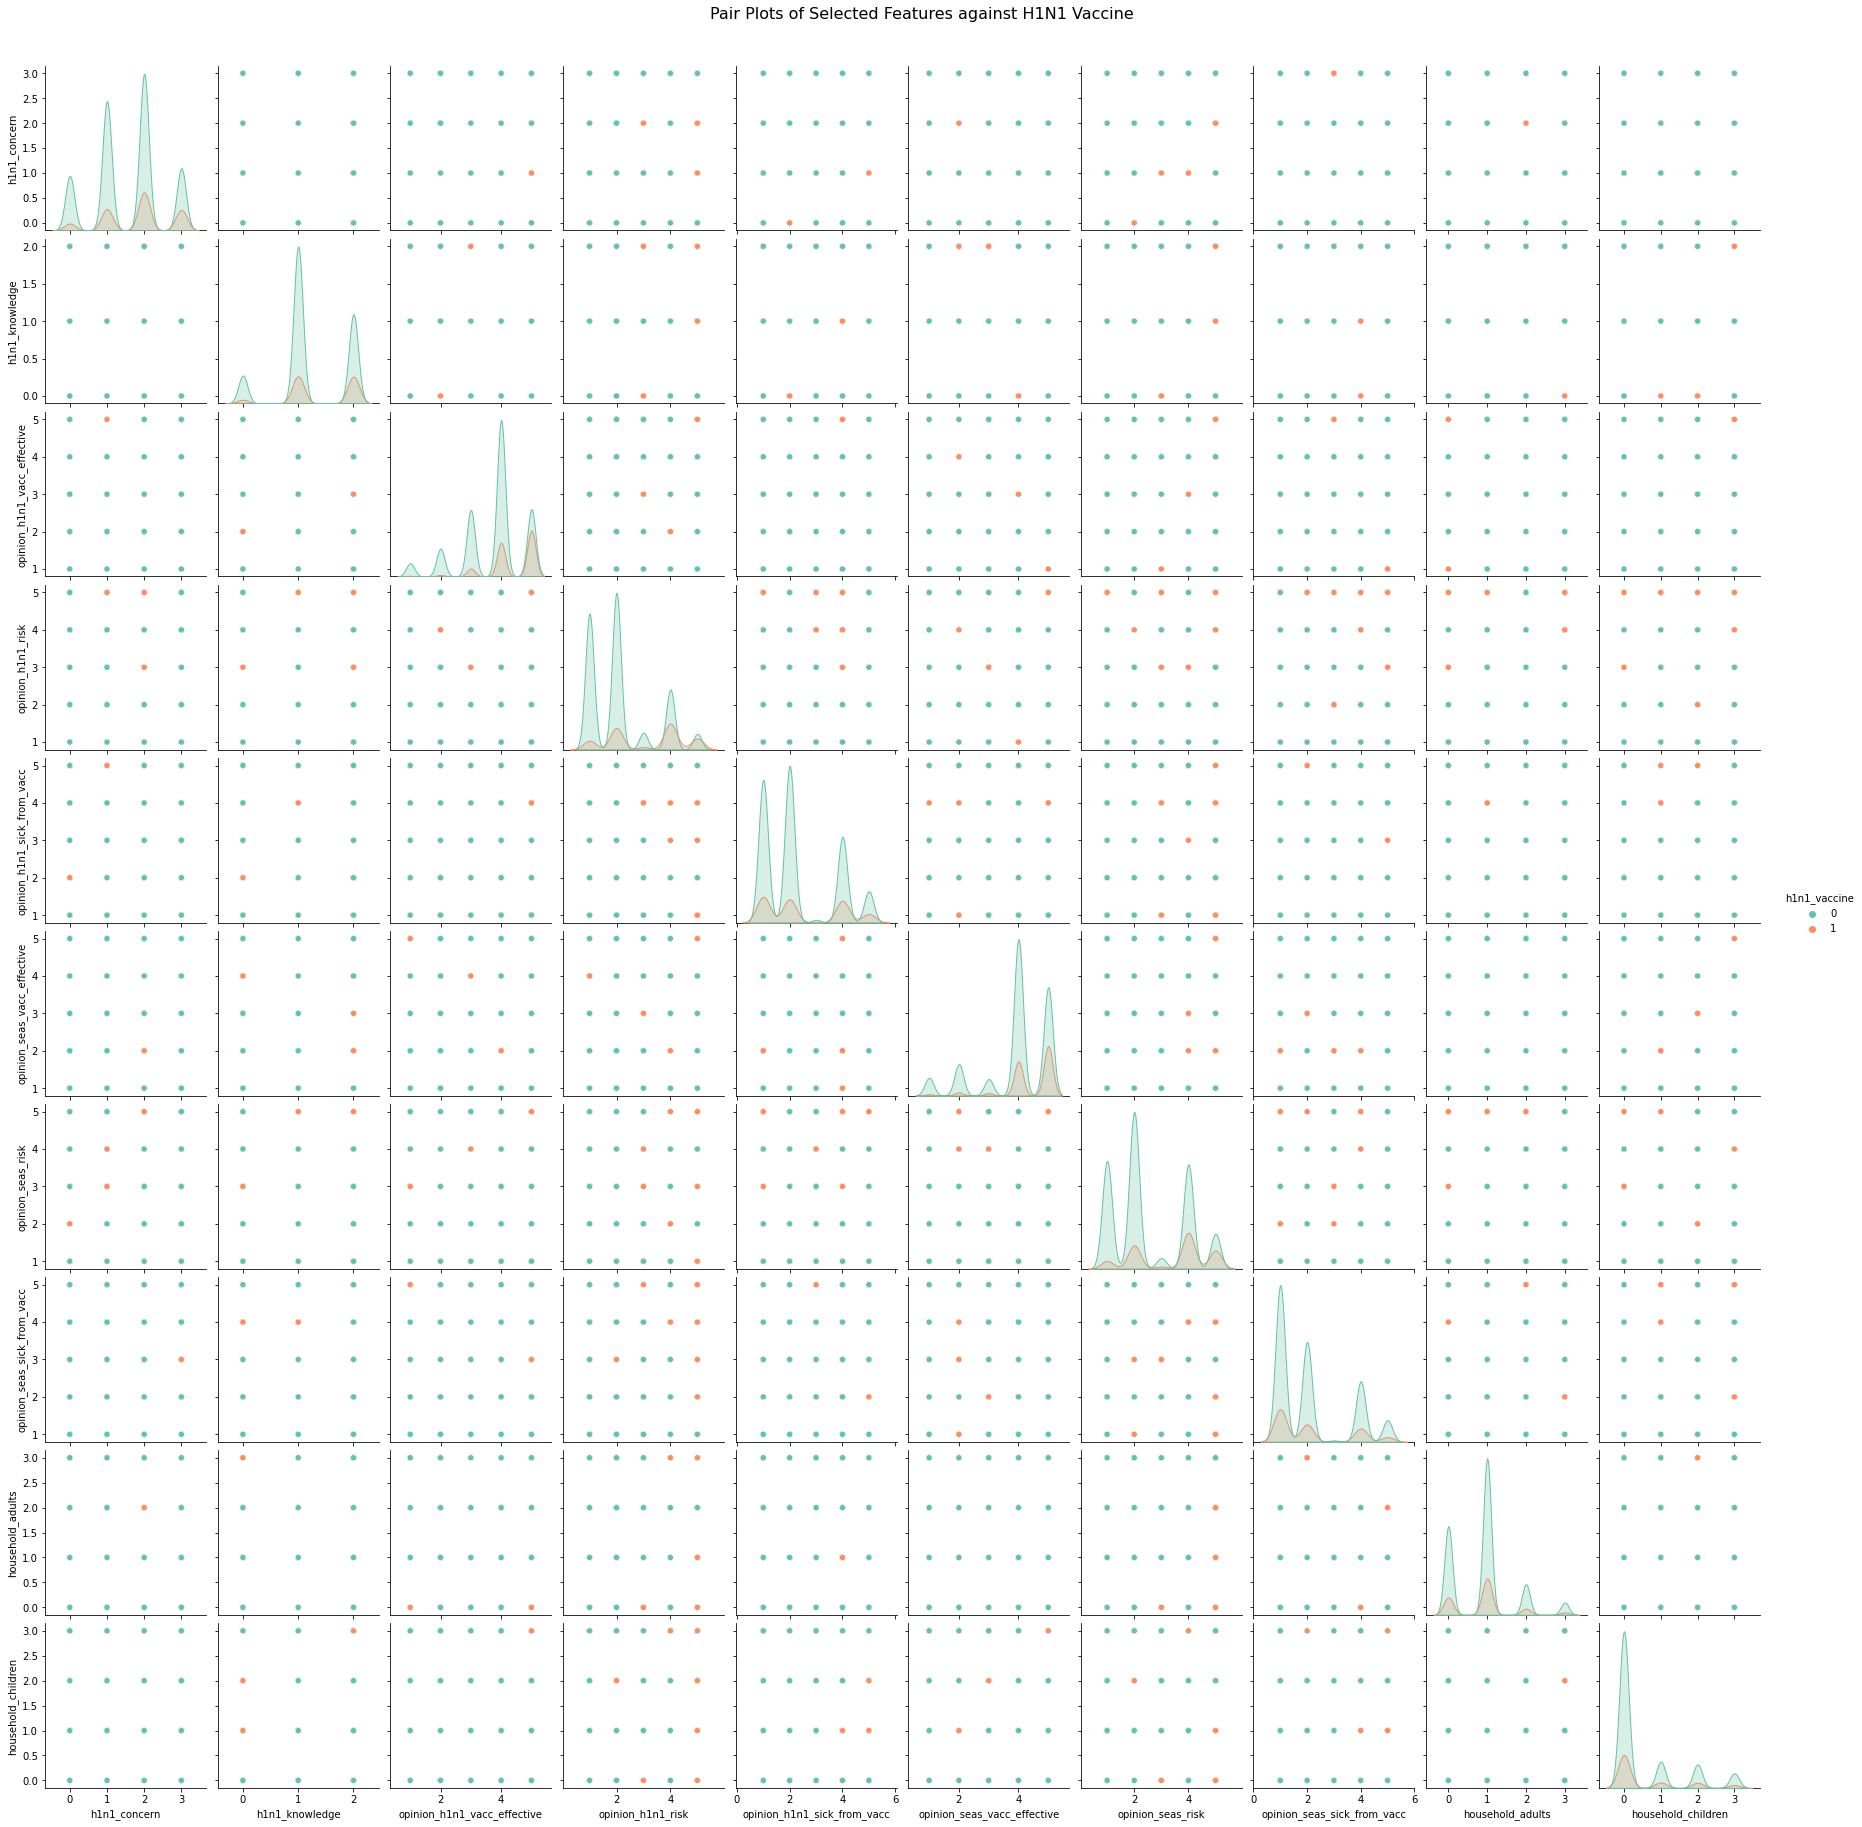

In [ ]:
columns_of_interest = [
    'h1n1_concern', 'h1n1_knowledge','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
    'opinion_seas_sick_from_vacc', 'household_adults', 'household_children','h1n1_vaccine'
]
# Pair plot with hue as the target variable
sns.pairplot(train_data_cleaned[columns_of_interest], hue='h1n1_vaccine', palette='Set2')

# Show plot
plt.suptitle('Pair Plots of Selected Features against H1N1 Vaccine', y=1.02, fontsize=16)
plt.show()

In [ ]:
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

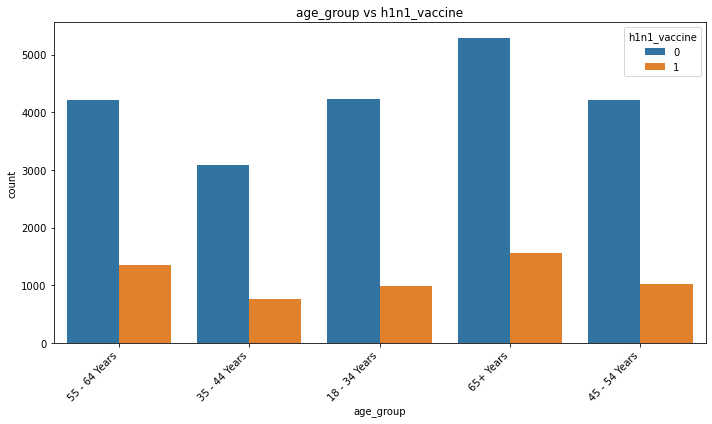

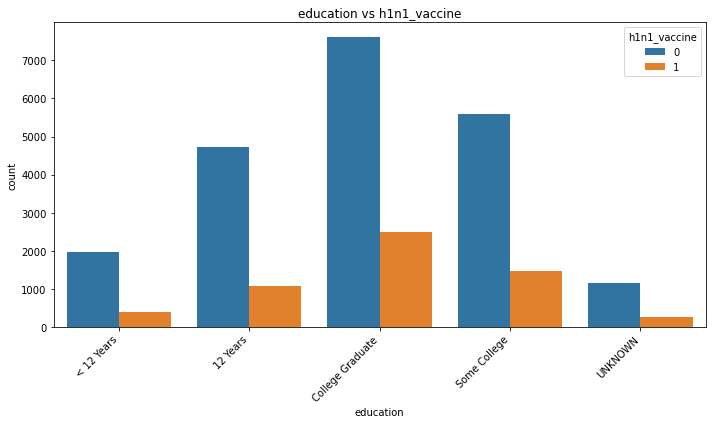

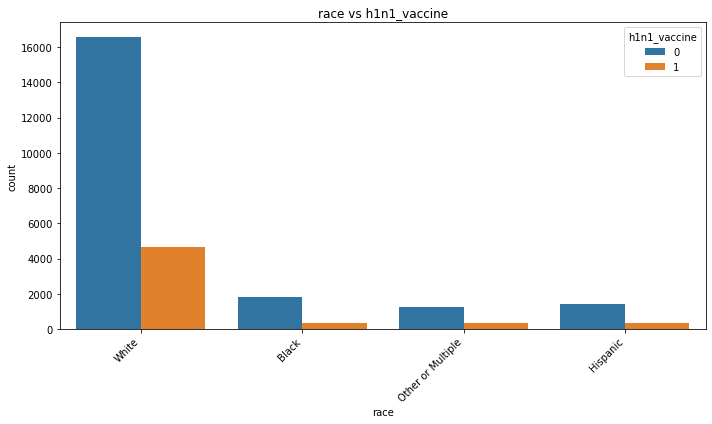

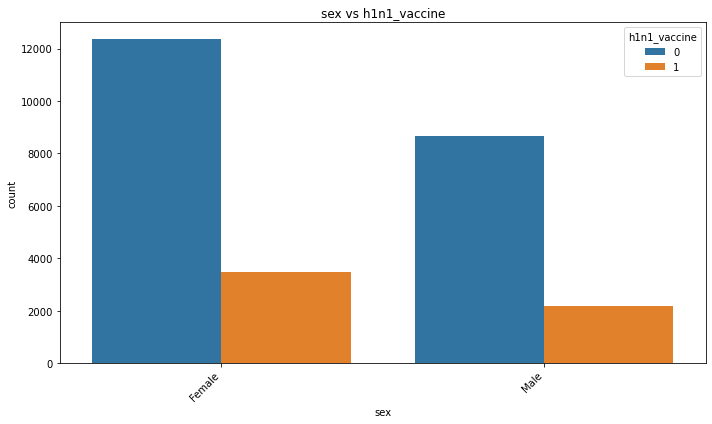

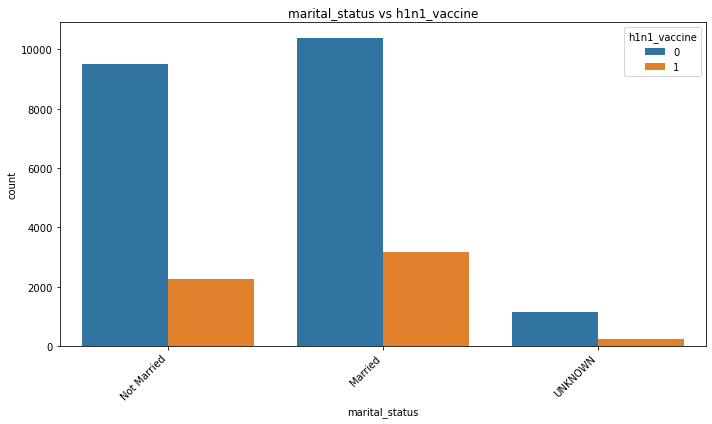

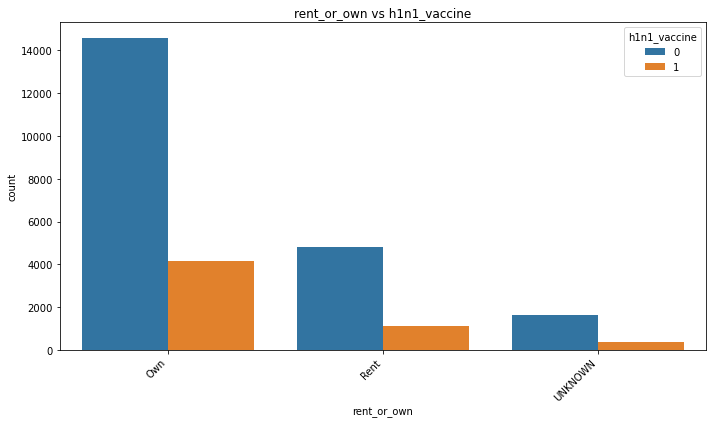

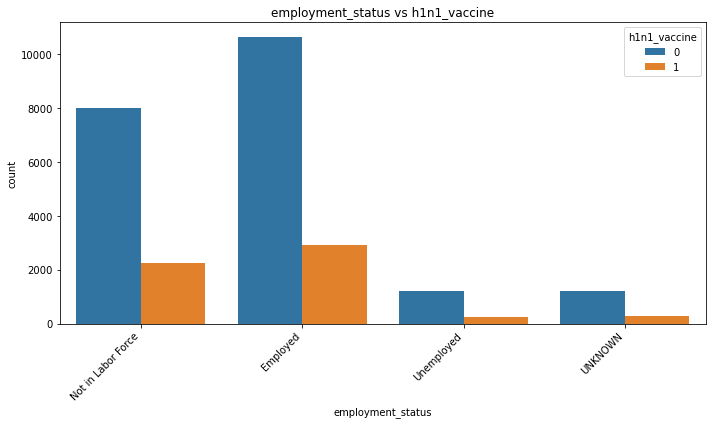

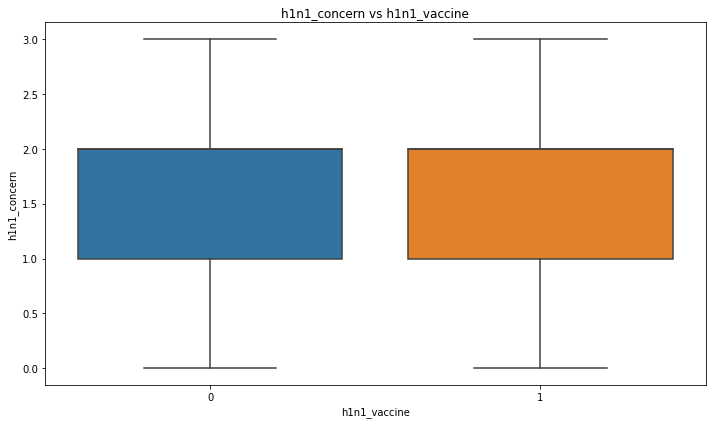

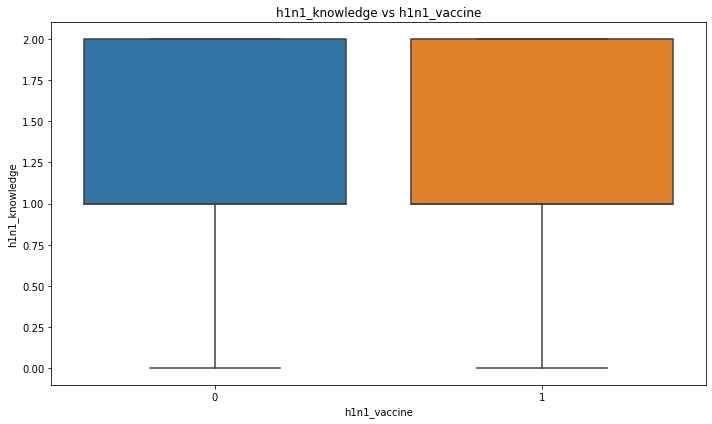

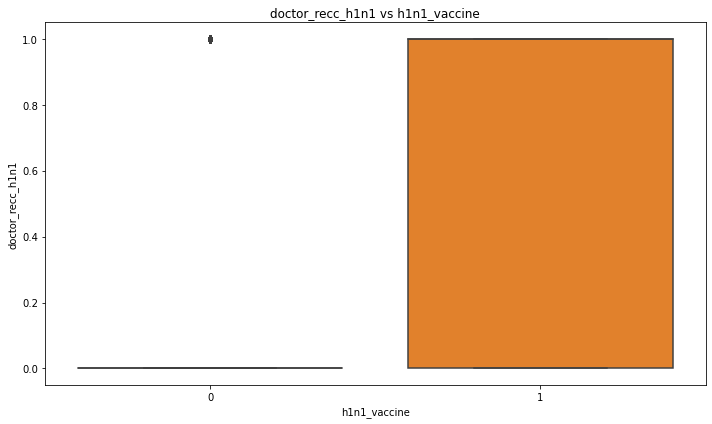

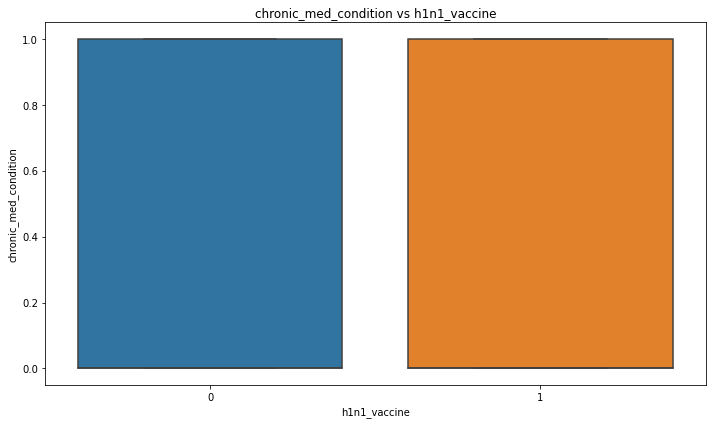

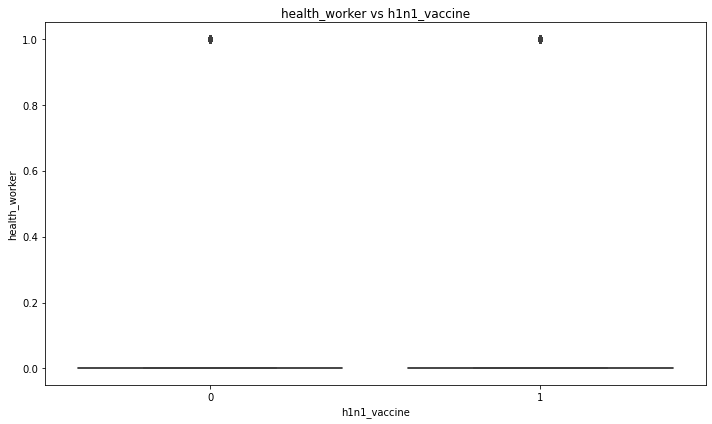

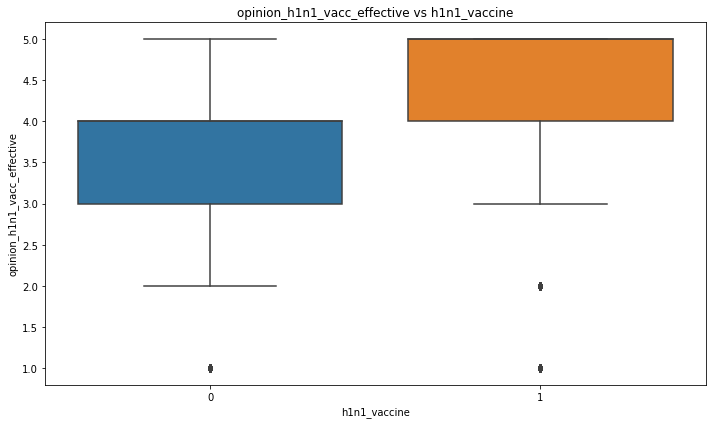

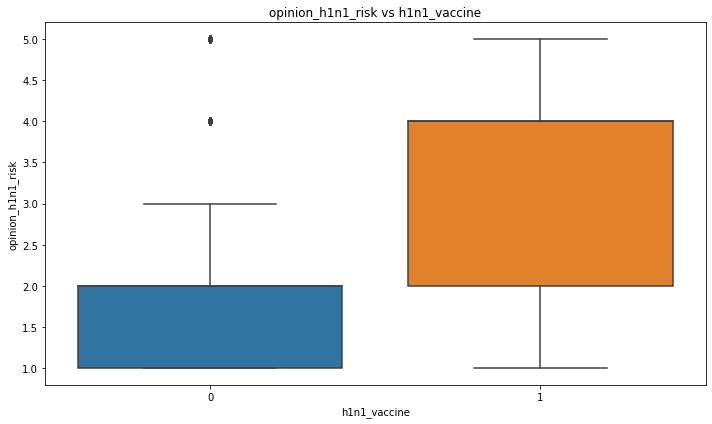

In [ ]:
# Function to plot categorical features
def plot_categorical(feature):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data_cleaned, x=feature, hue='h1n1_vaccine')
    plt.title(f'{feature} vs h1n1_vaccine')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Function to plot numerical features
def plot_numerical(feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_data_cleaned, x='h1n1_vaccine', y=feature)
    plt.title(f'{feature} vs h1n1_vaccine')
    plt.tight_layout()
    plt.show()

# Categorical features
categorical_features = ['age_group', 'education', 'race', 'sex', 'marital_status', 'rent_or_own', 'employment_status']

# Numerical features
numerical_features = ['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'chronic_med_condition', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk']

# Plot categorical features
for feature in categorical_features:
    plot_categorical(feature)

# Plot numerical features
for feature in numerical_features:
    plot_numerical(feature)

*KEY INSIGHTS*
Insights from the Plots on Features against Vaccine Uptake:

Age Group:

H1N1 Vaccine Uptake: Generally rather low for all age groups, but the 65+ age bracket is highly represented both in terms of non-vaccinated and reasonable numbers of vaccinated individuals, similar to the 55-64 age group.

Education Level:

Vaccination Rates: College students have a higher number not receiving the vaccine than other education levels.

Race:

Vaccination Trends: Whites have the most unvaccinated and vaccinated of any races.
Sex:

Gender Differences: Females have more unvaccinated and vaccinated than males. The unvaccinated females are very slightly higher.
Marital Status:

Vaccination Patterns: Married has the largest amount of unvaccinated and vaccinated of other marital statuses.
Rent or Own:

Housing Situation: The percentages of unvaccinated people are higher for homeowners, whereas for renters, these are relatively low.

Employment Status:

Employment and Vaccination: Employed and not-in-labor-force have a higher number of unvaccinated portions as compared to other employment statuses.
Doctor Recommendation:

Impact on Vaccination: The majority of the people who have been vaccinated got a doctor's recommendation, and conversely, the vast majority of those who were not did not get one. This would suggest that doctor recommendations are crucial to vaccine uptake; however, some received the recommendation and were vaccinated anyway.
Opinion on Vaccine Effectiveness:

Correlation with Vaccination: People who got vaccinated had a higher opinion concerning the effectiveness of the vaccine. The medium position of vaccinated persons is higher, which testifies that belief in efficacy is associated with vaccination.
Opinion on H1N1 Risk:

Perception vs. Vaccination: The Vaccinated are perceiving a higher risk from H1N1 and also vary more in their perceptions of risk. This suggests that the higher the perceived risk, the higher the likelihood of vaccination.
Chronic Medical Condition:

Vaccination and health status: The vaccination rates are almost identical among people whether they have or do not have chronic medical conditions. For this reason, chronic conditions might not be much influential while making a vaccination decision. Further, more detailed analysis may be required for more insight.



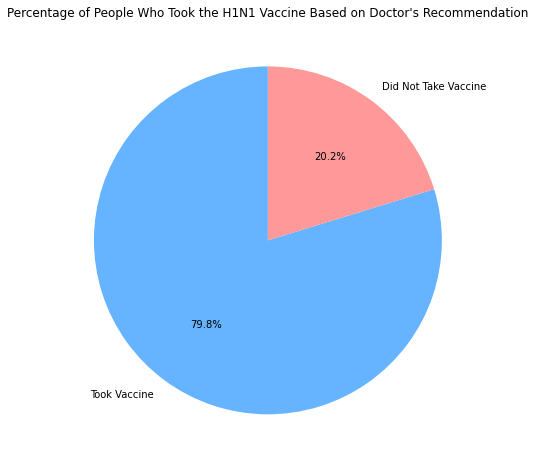

In [ ]:
# Calculate the percentage of people who took and did not take the vaccine
counts = train_data_cleaned['doctor_recc_h1n1'].value_counts()
labels = ['Took Vaccine', 'Did Not Take Vaccine']
colors = ['#66b3ff','#ff9999']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of People Who Took the H1N1 Vaccine Based on Doctor\'s Recommendation')
plt.show()

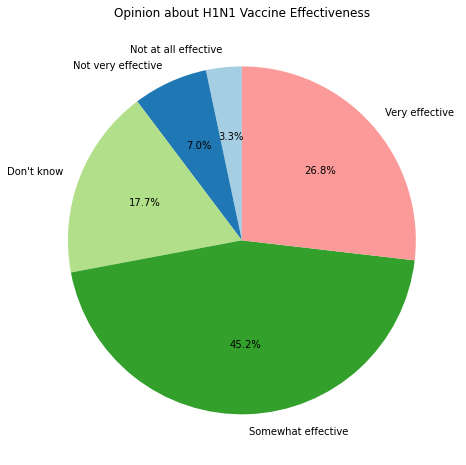

In [ ]:
# Calculate the value counts
counts = train_data_cleaned['opinion_h1n1_vacc_effective'].value_counts().sort_index()
labels = ['Not at all effective', 'Not very effective', 'Don\'t know', 'Somewhat effective', 'Very effective']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Opinion about H1N1 Vaccine Effectiveness')
plt.show()

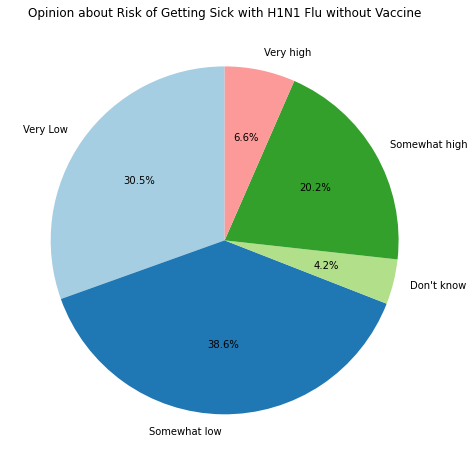

In [ ]:
# Calculate the value counts
counts = train_data_cleaned['opinion_h1n1_risk'].value_counts().sort_index()
labels = ['Very Low', 'Somewhat low', 'Don\'t know', 'Somewhat high', 'Very high']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('rISK of Getting H1N1 without Vaccination')
plt.show()

## FEATURE SELECTION ##

Drop the unique identifier 'respondent_id' as it doesn't provide predictive value for our model.

In [ ]:
# we first drop the unique identifier which is the respondent_id
train_data_cleaned.drop(columns=['respondent_id'], inplace=True)


We also added columns due to categorical columns that we transformed with OneHotEncoder. We also filled null values with Iterative Imputer, which was a better alternative to simple imputer for our dataset. We replaced category names with frequency counts with CountEncoder for the columns which had more than 10 unique categories. We used pipelines to make preprocessing and modelling more efficient, and also to prevent data leakage. We also decided to split training and testing data twice so that we could have a holdout set to test our final model's generalizability at the end.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
categorical_cols = ['age_group', 'education', 'race', 'sex', 'marital_status', 'rent_or_own', 'employment_status',]
le = LabelEncoder()

for col in categorical_cols:
    train_data_cleaned[col] = le.fit_transform(train_data_cleaned[col])


Use correlation matrix to visualize the relationships between features.

To check for multicollinearity and selecting relevant features.

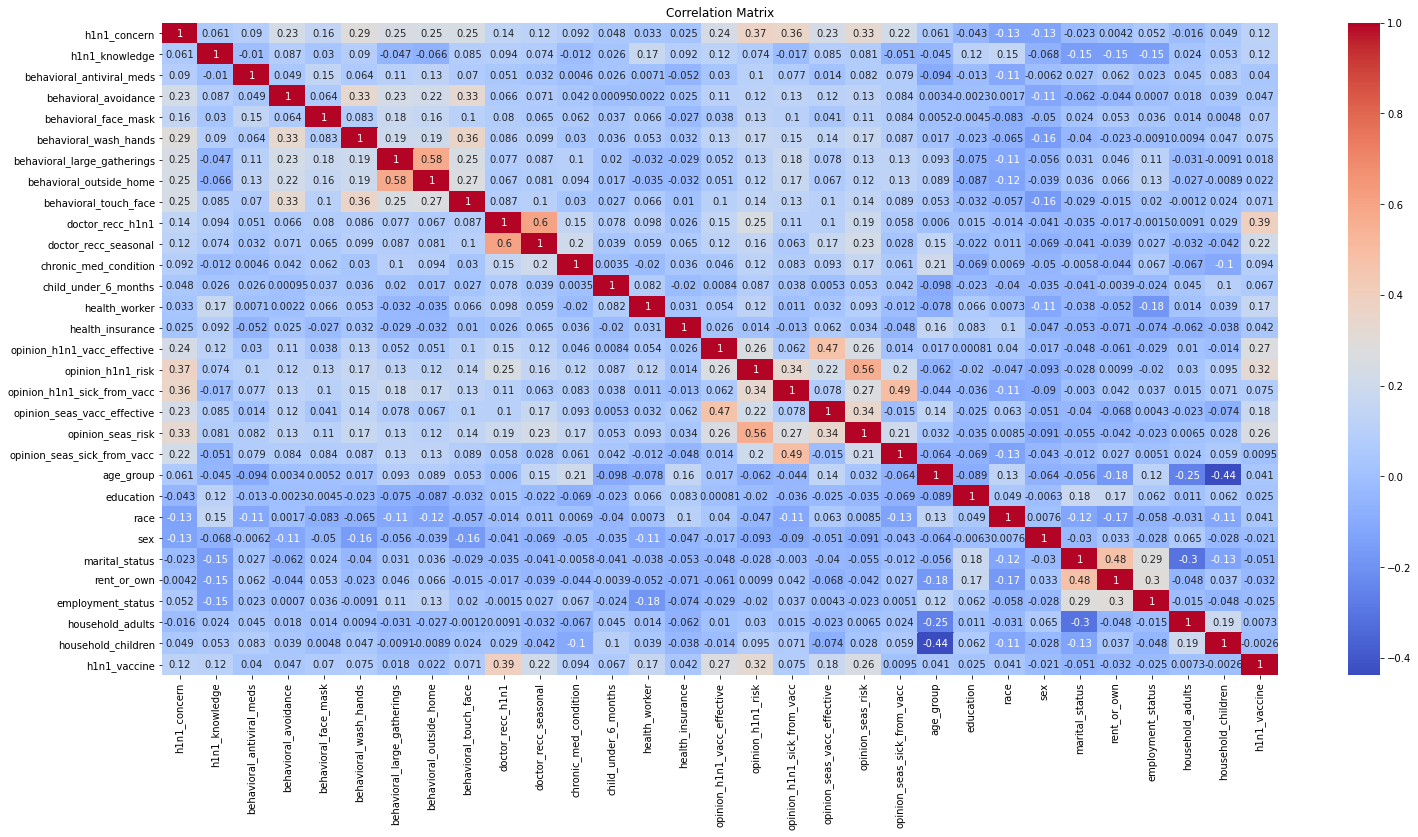

In [ ]:

# Correlation matrix
corr_matrix = train_data_cleaned.corr()
plt.figure(figsize=(25, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Selected features: ['opinion_seas_risk', 'race', 'behavioral_large_gatherings', 'household_children', 'household_adults', 'age_group', 'behavioral_outside_home', 'marital_status', 'behavioral_touch_face', 'opinion_seas_vacc_effective', 'education', 'opinion_h1n1_risk', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'h1n1_concern', 'rent_or_own', 'respondent_id', 'opinion_h1n1_sick_from_vacc', 'h1n1_knowledge', 'opinion_seas_sick_from_vacc', 'behavioral_wash_hands', 'employment_status','health_worker', 'chronic_med_condition', 'behavioral_avoidance']

These features represent a mix of demographic factors, behaviors, opinions, and health status that are likely to influence vaccination decisions. The selection aims to capture various aspects that may contribute to an individual's choice to get vaccinated.


# MODEL PREPARATION #

We WILL use a variety of models so as to find the most accurate model. Because there are many different hyperparameters for each model and we did not know the optimal combinations

In [ ]:
#Import modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# List of selected features
selected_features = ['opinion_seas_risk', 'race', 'behavioral_large_gatherings', 'household_children',
                     'household_adults', 'age_group', 'behavioral_outside_home', 'marital_status',
                     'behavioral_touch_face', 'opinion_seas_vacc_effective', 'education', 'opinion_h1n1_risk',
                     'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'h1n1_concern', 'rent_or_own',
                     'opinion_h1n1_sick_from_vacc', 'h1n1_knowledge', 'opinion_seas_sick_from_vacc',
                     'behavioral_wash_hands', 'employment_status', 'health_worker', 'chronic_med_condition',
                     'behavioral_avoidance']

# Separate features and target
X = train_data_cleaned[selected_features]
y = train_data_cleaned['h1n1_vaccine']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols)
    ])


In [ ]:
# Create pipelines for each model
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])



In [ ]:
# Split the data to 80% train and 20 % test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to calculate and print metrics
def print_metrics(y_true, y_pred, y_pred_proba, model_name):
    print(f"\n{model_name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("AUC:", roc_auc_score(y_true, y_pred_proba))

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_pred_proba):.2f})')

# Fit Logistic Regression
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['opinion_seas_risk', 'behavioral_large_gatherings',
       'household_children', 'household_adults', 'behavioral_outside_home',
       'behavioral_touch_face', 'opinion_seas_vacc_effective',
       'opinion_h1n1_risk', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective',
       'h1n1_concern', 'opinion_h1n1_sick_from_vacc', 'h1n1_knowledge',
       'opinion_seas_sick_from_vacc', 'behavioral_wash_hands', 'health_worker',
       'chronic_med_condition', 'behavioral_avoidance'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  Index([], dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [ ]:
# Predictions for Logistic Regression
y_train_pred_lr = lr_pipeline.predict(X_train)
y_test_pred_lr = lr_pipeline.predict(X_test)
y_train_pred_proba_lr = lr_pipeline.predict_proba(X_train)[:, 1]
y_test_pred_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]



In [ ]:
# Print metrics for Logistic Regression
print_metrics(y_train, y_train_pred_lr, y_train_pred_proba_lr, "Logistic Regression (Train)")
print_metrics(y_test, y_test_pred_lr, y_test_pred_proba_lr, "Logistic Regression (Test)")


Logistic Regression (Train) Results:
Accuracy: 0.8327170606131523
Precision: 0.6777859237536656
Recall: 0.4069102112676056
F1 Score: 0.5085258525852585
AUC: 0.824369038565559

Logistic Regression (Test) Results:
Accuracy: 0.8362036690378135
Precision: 0.6970633693972179
Recall: 0.3991150442477876
F1 Score: 0.5075970737197524
AUC: 0.8224984032137425


**1. DECISION TREES**

Best Decision Tree parameters: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Logistic Regression (Train) Results:
Accuracy: 0.8327170606131523
Precision: 0.6777859237536656
Recall: 0.4069102112676056
F1 Score: 0.5085258525852585
AUC: 0.824369038565559

Logistic Regression (Test) Results:
Accuracy: 0.8362036690378135
Precision: 0.6970633693972179
Recall: 0.3991150442477876
F1 Score: 0.5075970737197524
AUC: 0.8224984032137425

Decision Tree (Train) Results:
Accuracy: 0.8311724783524456
Precision: 0.6677407805227354
Recall: 0.410431338028169
F1 Score: 0.5083821725500886
AUC: 0.8194617337294681

Decision Tree (Test) Results:
Accuracy: 0.8371396480718832
Precision: 0.6884057971014492
Recall: 0.42035398230088494
F1 Score: 0.5219780219780219
AUC: 0.818300746287472


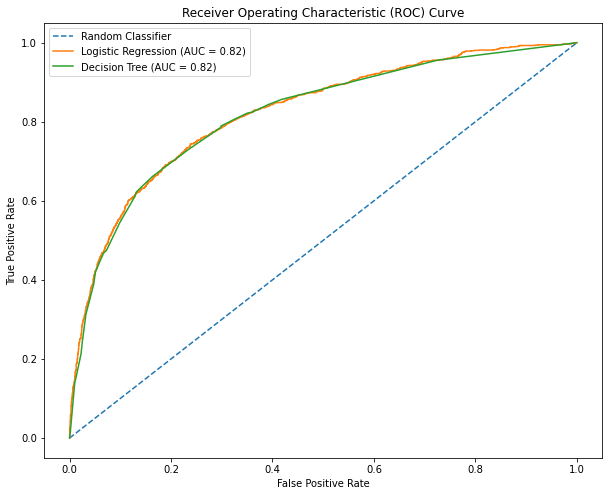

In [ ]:
# Decision Tree with GridSearchCV
dt_params = {
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(dt_pipeline, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

print("Best Decision Tree parameters:", dt_grid.best_params_)
dt_best = dt_grid.best_estimator_

# Evaluate all models
models = {
    "Logistic Regression": lr_pipeline,
    "Decision Tree": dt_best,
}

# Plotting ROC curves
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]

    print_metrics(y_train, y_train_pred, y_train_pred_proba, f"{name} (Train)")
    print_metrics(y_test, y_test_pred, y_test_pred_proba, f"{name} (Test)")

    plot_roc_curve(y_test, y_test_pred_proba, name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## **HYPERPARAMETER TUNING FOR LOGISTIC MODEL**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for Logistic Regression
param_grid = [
    {
        'classifier__penalty': ['l2', 'none'],
        'classifier__solver': ['newton-cg', 'lbfgs', 'sag'],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__max_iter': [100, 200, 300]
    },
    {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear'],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__max_iter': [100, 200, 300]
    }
]

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lr_pipeline, param_grid=param_grid,
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best AUC Score:", best_score)

# Use the best model from GridSearchCV for predictions
best_model = grid_search.best_estimator_

# Predictions for Logistic Regression with tuned parameters
y_train_pred_lr_tuned = best_model.predict(X_train)
y_test_pred_lr_tuned = best_model.predict(X_test)
y_train_pred_proba_lr_tuned = best_model.predict_proba(X_train)[:, 1]
y_test_pred_proba_lr_tuned = best_model.predict_proba(X_test)[:, 1]

# Print metrics for Logistic Regression with tuned parameters
print_metrics(y_train, y_train_pred_lr_tuned, y_train_pred_proba_lr_tuned, "Tuned Logistic Regression (Train)")
print_metrics(y_test, y_test_pred_lr_tuned, y_test_pred_proba_lr_tuned, "Tuned Logistic Regression (Test)")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best AUC Score: 0.8235083505314466

Tuned Logistic Regression (Train) Results:
Accuracy: 0.8312660893985491
Precision: 0.676304919263988
Recall: 0.3963468309859155
F1 Score: 0.4997918690162342
AUC: 0.8245292669981604

Tuned Logistic Regression (Test) Results:
Accuracy: 0.8352676900037439
Precision: 0.6984126984126984
Recall: 0.3893805309734513
F1 Score: 0.5
AUC: 0.8247613224751869


### Hyperparameter Tuning Results

After using GridSearchCV to tune the hyperparameters of the Logistic Regression model, the performance metrics (accuracy, precision, recall, F1 score, and AUC) were compared to the initial model's performance. The results showed minimal to no improvement, indicating that the default parameters of the Logistic Regression model were likely already well-optimized for this dataset. Consequently, the hyperparameter tuning did not yield a significant enhancement in model performance.


**Model Performance Overview**

Summary of performance of above two models that have been trained to predict H1N1 vaccination statistics

### Logistic Regression
- Train Accuracy: 83.27%, Test Accuracy: 83.62%
- Precision: 69.71%, Recall: 39.91%, F1 Score: 50.76%
- AUC: 0.8225

### Decision Tree
- Best parameters: max_depth=5, min_samples_leaf=1, min_samples_split=2
- Train Accuracy: 83.12%, Test Accuracy: 83.71%
- Precision: 68.84%, Recall: 42.04%, F1 Score: 52.20%
- AUC: 0.8183

Model Comparison and Insights:

Average Performance:

Both models had similar performances at about 83-84% accuracy. That essentially means their performances are almost identical and thus are capturing the significant patterns in the data set quite well.
Precision vs Recall Trade-off

Both models were more exact than their recall. This indicates that while both models are more precise in predicting the positive cases (uptake of vaccines), they tend to miss some actual positive cases. That is, when they predict that somebody will get vaccinated, they generally get it right, but some true positive cases are missed.
Decision Tree Advantage:

On F1 score, the Decision Tree model is slightly better, and in terms of recall, it may be a little better to find more people who get vaccinated.

AUC Scores:

Both models have AUC scores greater than 0.8, which means they were very good at distinguishing between classes: vaccinated and unvaccinated.

Overfitting:

The small variation in train and test accuracy will imply that none of these models overfit this data considerably.
Further Analysis:

Confusion Matrix:

To look at the models' predictions and what kind of errors are occurring.

Classification Report:

Provides precision, recall, and F1-score for each class to give a more detailed look as to how well each model performs.

Calibration Curve:

It plots how close the predicted probabilities match the actual outcomes and gives an idea about the reliability of the predicted probability.

Feature Importance:

This identifies the features that mostly drive the vaccine uptake predictions in the model at hand, Logistic Regression; it may help in feature selection and improving the model in further steps.

## **MODEL EVALUATION** ##
 Decision Trees and Logistic Regression

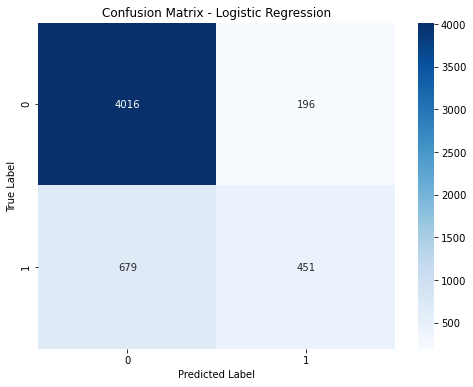


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.70      0.40      0.51      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.68      0.70      5342
weighted avg       0.82      0.84      0.82      5342



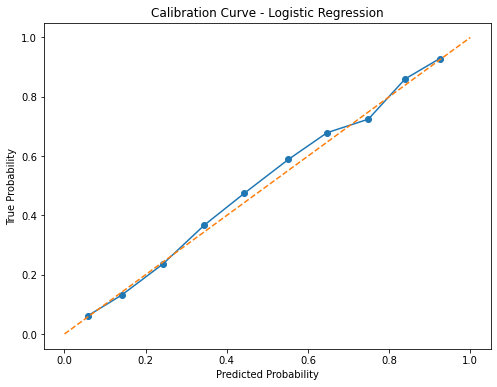

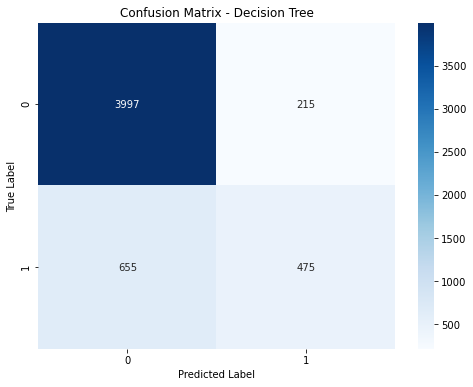


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.69      0.42      0.52      1130

    accuracy                           0.84      5342
   macro avg       0.77      0.68      0.71      5342
weighted avg       0.82      0.84      0.82      5342



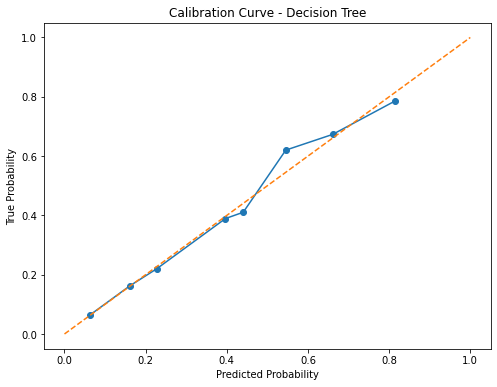

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.calibration import calibration_curve


def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Classification Report
    print(f"\nClassification Report - {model_name}:")
    print(classification_report(y_test, y_test_pred))

    # Calibration Curve
    plt.figure(figsize=(8, 6))
    prob_true, prob_pred = calibration_curve(y_test, y_test_proba, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('Predicted Probability')
    plt.ylabel('True Probability')
    plt.title(f'Calibration Curve - {model_name}')
    plt.show()

# Evaluate models
evaluate_model(lr_pipeline, X_train, X_test, y_train, y_test, "Logistic Regression")
evaluate_model(dt_best, X_train, X_test, y_train, y_test, "Decision Tree")

## Model Evaluation: Logistic Regression

### Confusion Matrix Analysis

Observations
- True Negatives TN = 4016: Correctly predicted non-vaccinated
- False Positives FP = 196: Incorrectly predicted as Vaccinated
- False Negatives FN = 679: Incorrectly predicted as non-vaccinated
- True Positives TP = 451: Correctly predicted vaccinated

Observations:
1. It does a very good job in identifying non-vaccinated ones since the TN value is very high.
2. The number of false negatives is quite significant, which shows that this model underestimates vaccination in general.
3. This model has relatively few false positives and thus is conservative in predicting vaccination.

Key Takeaway:
1. For the class 1 or vaccinated class, the precision value is high, 0.70, which shows that the model, when it predicts vaccination, is correct.
2. For class 1, the recall value is low at 0.40, indicating that this model misses many actually vaccinated people.
3. For class 0, representing the non-vaccinated class, both precision, 0.86, and recall, 0.95, are high for this model.
4. Overall accuracy is 0.84, which agrees with the picture that we had developed so far.

### Calibration Curve

The following calibration curve shows that:

1. The model's predicted probabilities closely follow the ideal calibration represented by the diagonal line.
2. At very low and very high probabilities, slight deviations show; overall, however, it is well-calibrated.
3. This would suggest that the probability estimates from this model are reliable and can be treated as true probabilities.

## Model Evaluation: Decision Tree

### Confusion Matrix Analysis


The confusion matrix for our Decision Tree model shows:
- True Negatives (TN): 3997 - Correctly predicted non-vaccinated individuals
- False Positives (FP): 215 - Incorrectly predicted as vaccinated
- False Negatives (FN): 655 - Incorrectly predicted as non-vaccinated
- True Positives (TP): 475 - Correctly predicted vaccinated individuals

Observations:
1. The model excels at identifying non-vaccinated individuals (high TN).
2. There's a significant number of false negatives, indicating some underprediction of vaccination.
3. The model has relatively few false positives, suggesting a conservative approach in predicting vaccination.

Key insights:
1. High precision (0.69) for class 1 (vaccinated) indicates that when the model predicts vaccination, it's often correct.
2. Improved recall (0.42) for class 1 compared to Logistic Regression, suggesting it captures more actually vaccinated individuals.
3. The model performs very well for class 0 (non-vaccinated), with high precision (0.86) and recall (0.95).
4. Overall accuracy is 0.84, consistent with the Logistic Regression model.

### Calibration Curve


The calibration curve reveals:
1. The model's predicted probabilities deviate from the ideal calibration (diagonal line) more than the Logistic Regression model.
2. Overconfidence in predictions around 0.4-0.6 probability range, and underconfidence in higher probabilities.
3. This suggests the Decision Tree's probability estimates are less reliable than those of Logistic Regression.

## Model Comparison and Final Selection

Let's compare the performance of our Logistic Regression and Decision Tree models:

| Metric | Logistic Regression | Decision Tree |
|--------|---------------------|---------------|
| Accuracy | 0.84 | 0.84 |
| Precision (Class 1) | 0.70 | 0.69 |
| Recall (Class 1) | 0.40 | 0.42 |
| F1-Score (Class 1) | 0.51 | 0.52 |
| AUC | 0.8225 | 0.8183 |



# **Final Model : Logistic Regression** #

After comparing the two models, we recommend **Logistic Regression** as the final model for this project.
Reasons for choosing logistic regression.

1. **Comparable Performance**: Overall accuracies and F1-scores of both models are very similar.
2. **Better Calibration**: Probabilities estimated by the Logistic Regression model are more reliable, which can be seen from its calibration curve.
3. **Interpretability**: Feature importance is more interpretable with logistic regression, which might be helpful in understanding the factors affecting vaccination decisions.
4. **Generalization**: A smooth decision boundary of Logistic Regression may generalize better for unseen data compared to the hard splits of Decision Trees.
5. **Slightly Better AUC**: Logistic Regression presents a slightly higher AUC, which implies it has slightly better discriminative ability.

While the Decision Tree shows a slight privilege in recall for the vaccinated class, overall advantages of Logistic Regression-its better calibration and interpretability-make it the preferred choice for our case.


## **CONCLUSION AND RECOMMENDATIONS** ##

## CONCLUSION

The modeling results show that both the Logistic Regression and Decision Tree models performed reasonably well in predicting vaccine uptake, with overall accuracies of around 83%. However, both models exhibit limitations, particularly in recall for the vaccinated class, indicating they miss a significant number of individuals who did get vaccinated. The models are better at identifying non-vaccinated individuals, as evidenced by the higher precision and recall for the non-vaccinated class.

Because the logistic regression model does a good job of minimizing the false positive rate on the hold out data, we are fairly confident that it will generalize well to unseen data and will accurately help public health officals determine the people who didn't get the vaccine.

We also looked into feature importances to understand the relationship between the features and vaccination behavior. We saw that the demographic and behavioral features are not that important compared to health related factors and opinions. The doctor recommendation, health insurance, opinion of vaccine efficiency, and opinion of H1N1 risk are the top important factors in determining people's vaccination status.

## RECOMMEDATION

We recommend that public health officials to communicate to doctors the importance of recommending to patients that they get the H1N1 vaccine.

We also recommend that they find a way to make the vaccine accessible to people regardless of health insurance status.

Additionally, because opinion on H1N1 vaccine effectiveness and H1N1 risk to health are highly influential in determining vaccination status, we recommend that the the body make educational outreach a priority.

Our analysis might not fully resolve the goal of predicting H1N1 vaccination status because we were not able to fully rule out false negatives, or people who we predicted as not getting vaccinated but actually did get the vaccine.

Additionally, there may be other factors at play which were not tapped into by this survey's questions which could also play a role in vaccination prediction.